<a id="section2"></a>
# Importing Required Libraries :

In [290]:
# This filters any outputs from libraries that we don't want to see, and clear_output removes any outputs generated by a cell
import warnings

from IPython.display import clear_output

warnings.filterwarnings('ignore')
clear_output()

In [291]:
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import missingno as msno  # For missing value visualization
import numpy as np
import pandas as pd
import plotly.express as px
# From here: https://www.tutorialspoint.com/plotly/plotly_plotting_inline_with_jupyter_notebook.htm
import plotly.offline as py
from wordcloud import STOPWORDS, WordCloud

py.init_notebook_mode(connected=True)

import time as t
from datetime import datetime, time, timedelta

from sklearn.feature_extraction.text import CountVectorizer
# library for loading
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [292]:
# matching strings via regex expressions
import re

# main nlp library and modell
import spacy

#load small english model
nlp = spacy.load("en_core_web_sm")

In [293]:
# Calculation of Performance of Models
from sklearn import metrics, preprocessing
from sklearn.metrics import (accuracy_score, f1_score, precision_score,
                             recall_score)
from sklearn.utils.multiclass import type_of_target

In [294]:
# Modelling Purpose
# Regression model
# Random classification, ignoring inputs
from sklearn.dummy import DummyClassifier
#implements a plain stochastic gradient descent learning routine which supports different loss functions and penalties for classification
from sklearn.linear_model import LinearRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsRegressor
# Support Vector Regression, based on SVMs (Support Vector Machines)
from sklearn.svm import SVR
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
#Vader SentimentAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [295]:
#snowballstemmer
import snowballstemmer

<a id="section3"></a>
# Data Exploration :

In [296]:
#either from 'data' or 'data_save' directory
data = pd.read_excel('data_save/tweets_apple.xlsx')
data.head()

,#,tweet_user_id,tweet_lang,tweet_text,tweet_created_at
0,1613540166336974848,1506718242638909462,en,$SPY #SPY \n\nC>399(E)/400.5/401.5/402/403.2\n...,2023-01-12T14:15:28.000Z
1,1613539843065237505,1211481418053767168,nl,"#dolarcedear #ahora\nAMZN $327,46 ($337,09)\nA...",2023-01-12T14:14:11.000Z
2,1613539682675216384,1508590781384183812,en,$AAPL looks like a good short from 138-140,2023-01-12T14:13:33.000Z
3,1613539408589774848,1138182455268184065,en,"@BadBeanieMan AAPL earnings in 2 weeks yet, ai...",2023-01-12T14:12:27.000Z
4,1613539401052860417,1495138508930891777,en,Thursday Watchlist:\n\n$AAPL 137c>135 | 128p<1...,2023-01-12T14:12:25.000Z


In [38]:
#understand shape of the data
data.shape

(15014, 5)

In [39]:
#columns and their data types and if they contain null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15014 entries, 0 to 15013
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   #                 15014 non-null  int64 
 1   tweet_user_id     15014 non-null  int64 
 2   tweet_lang        15014 non-null  object
 3   tweet_text        15014 non-null  object
 4   tweet_created_at  15014 non-null  object
dtypes: int64(2), object(3)
memory usage: 586.6+ KB


In [297]:
data.rename(columns={'#': 'tweet_id'}, inplace=True)

In [42]:
#check number of unique elements
data.nunique()

tweet_id            4485
tweet_user_id       3021
tweet_lang            28
tweet_text          3046
tweet_created_at    4422
dtype: int64

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15014 entries, 0 to 15013
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   tweet_id          15014 non-null  int64 
 1   tweet_user_id     15014 non-null  int64 
 2   tweet_lang        15014 non-null  object
 3   tweet_text        15014 non-null  object
 4   tweet_created_at  15014 non-null  object
dtypes: int64(2), object(3)
memory usage: 586.6+ KB


In [298]:
#check for duplicate tweets (tweet_id is different for every tweet)
data.drop_duplicates(subset=['tweet_id'], inplace=True)

<a id="section32"></a>
<div style="font-size:15px; font-family:verdana;"><h3 style="font-family:verdana;">Null Value Distribution:</h3>

<AxesSubplot: >

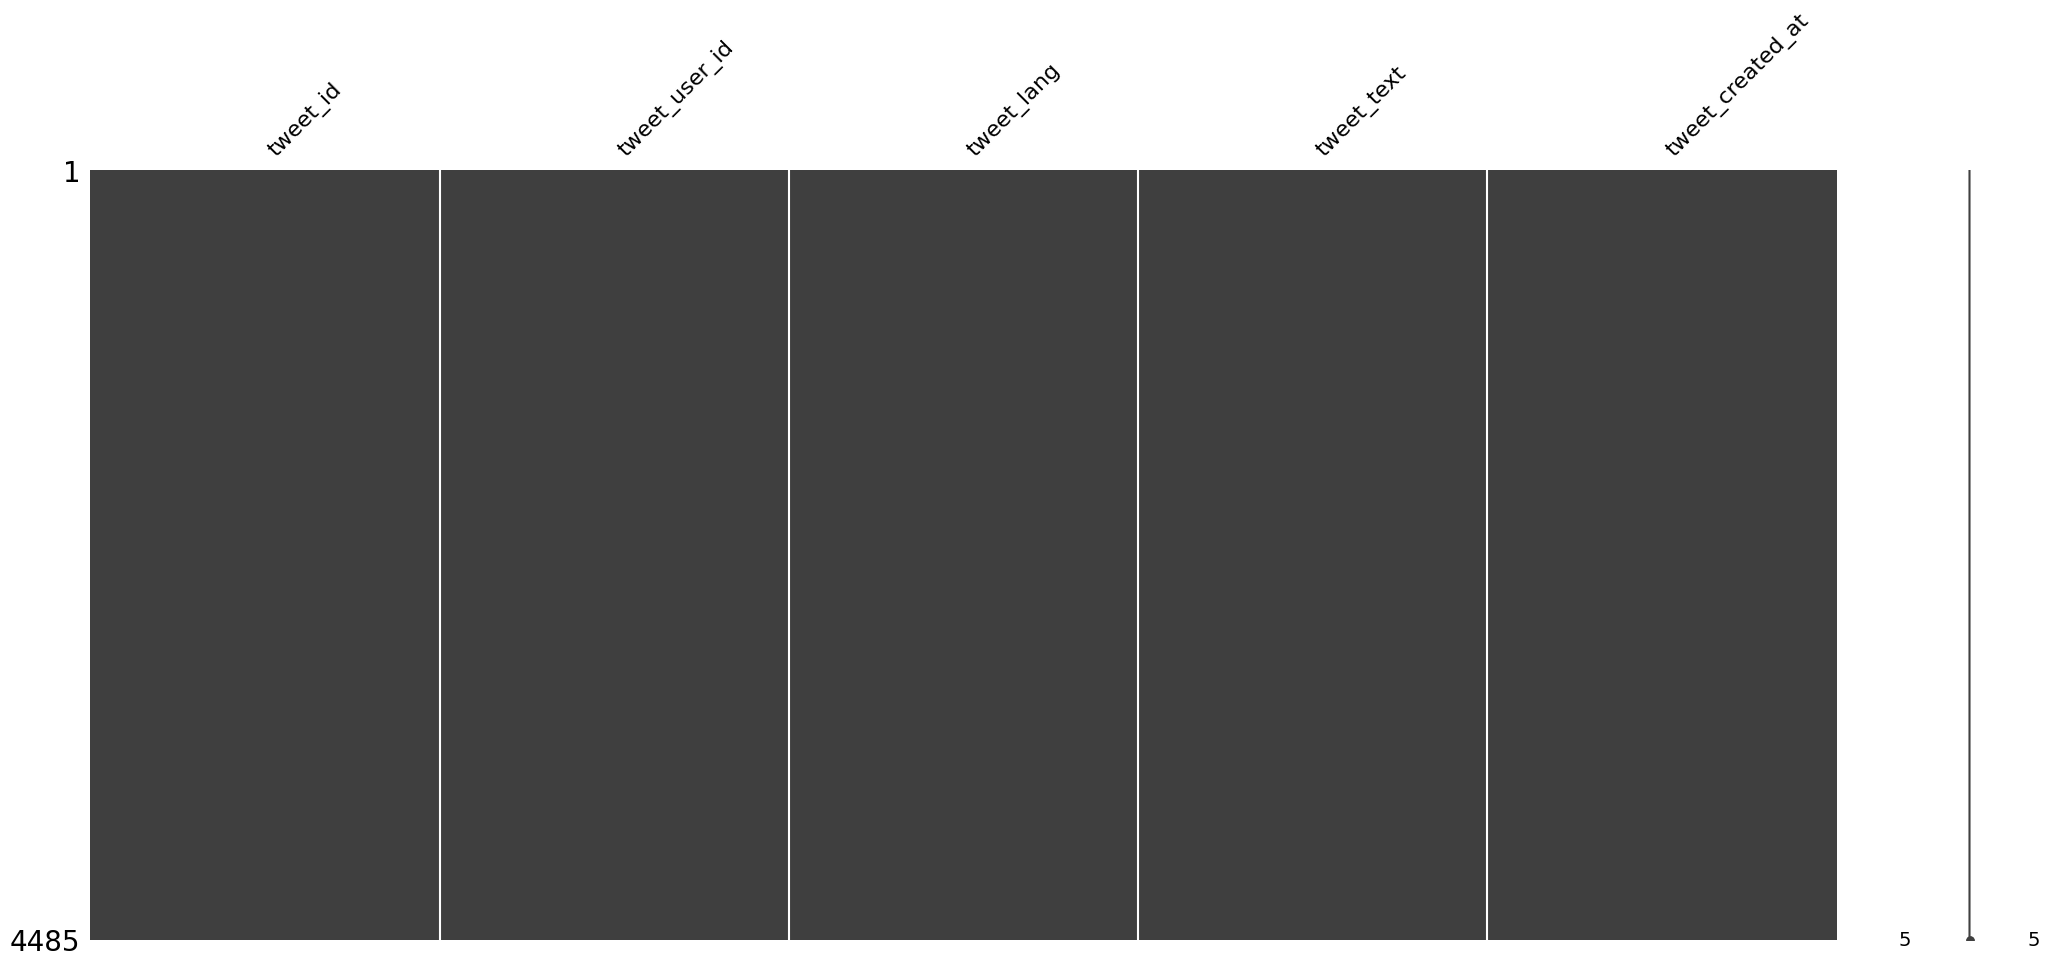

In [74]:
msno.matrix(data)

In [299]:
#convert ISO-8601 String to Date Format
data['tweet_created_at'] = pd.to_datetime(data['tweet_created_at']).dt.date.astype('datetime64')

In [300]:
#number of unique dates after Format Conversion
data['tweet_created_at'].nunique()

22

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4485 entries, 0 to 15013
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   tweet_id          4485 non-null   int64         
 1   tweet_user_id     4485 non-null   int64         
 2   tweet_lang        4485 non-null   object        
 3   tweet_text        4485 non-null   object        
 4   tweet_created_at  4485 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 210.2+ KB


## 

In [301]:
data_to_clean = data[data.tweet_lang == 'en']
data_to_clean.drop(['tweet_id', 'tweet_lang'],inplace=True,axis = 1)
data_to_clean.head()

,tweet_user_id,tweet_text,tweet_created_at
0,1506718242638909462,$SPY #SPY \n\nC>399(E)/400.5/401.5/402/403.2\n...,2023-01-12
2,1508590781384183812,$AAPL looks like a good short from 138-140,2023-01-12
3,1138182455268184065,"@BadBeanieMan AAPL earnings in 2 weeks yet, ai...",2023-01-12
4,1495138508930891777,Thursday Watchlist:\n\n$AAPL 137c>135 | 128p<1...,2023-01-12
6,1364926639096881153,$AAPL\n\nNew Apple Devices app for $MSFT Windo...,2023-01-12


<p style="font-size:15px; font-family:verdana; line-height: 1.7em">Removing all stopwords, html tags, mentions, multi-spaces, convert to lowercase and lemmatize/stemm tokens.</p>

In [60]:
stemmer = snowballstemmer.stemmer('english')

In [302]:
#cleaning unecessary text from the string 
def clean(text):
    # cleanup 
    text = re.sub('<.*?>+',' ',str(text)) #removing HTML Tags
    text = re.sub('\n', ' ',text) #removal of new line characters
    text = re.sub(r'\s+', ' ',text) #removal of multiple spaces
    text = re.sub(r'@\S+', '', text)  # Remove mentions
    text = text.lower() #convert to lowercase
    # tokenize and analyze text
    doc = nlp(text)
    
    #lemmatization
    tokens = [token.lemma_ for token in doc if not token.is_stop] #and token.is_alpha
    cleaned_text = " ".join(tokens) if len(tokens)>0 else None

    #stemming
    #cleaned_text = " ".join([stemmer.stemWord(token.text) for token in doc if not token.is_stop]) #and token.is_alpha
    
    return cleaned_text

In [303]:
#apply data-cleaning to the text-column
data_to_clean['tweet_text'] = data_to_clean['tweet_text'].apply(clean)

In [304]:
data_to_clean.head()

,tweet_user_id,tweet_text,tweet_created_at
0,1506718242638909462,$ spy # spy c>399(e)/400.5/401.5/402/403.2 p<3...,2023-01-12
2,1508590781384183812,$ aapl look like good short 138 - 140,2023-01-12
3,1138182455268184065,"aapl earning 2 week , be ?",2023-01-12
4,1495138508930891777,thursday watchlist : $ aapl 137c>135 | 128p<13...,2023-01-12
6,1364926639096881153,$ aapl new apple device app $ msft window ment...,2023-01-12


In [305]:
# drop empty columns after preprocessing
print(data_to_clean["tweet_text"].isna().sum())
data_to_clean.dropna(inplace=True)
print(data_to_clean["tweet_text"].isna().sum())

0
0


In [306]:
#understand shape of the data after cleanup
data_to_clean.shape

(3797, 3)

In [307]:
# store cleaned data
data_to_clean.to_csv("cleaned_data/cleaned_tweets_apple.csv", index=False)
#data_to_clean.to_csv("cleaned_data/cleaned_tweets_tesla.csv", index=False)

<a id="section34"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana;">⭐Important Observations :</h3>
    <div class="alert alert-block alert-info">
* <i> Before Cleaning: There are total of <code>5</code> columns and <code>15014</code> rows of data.</i><br>
* <i> After Cleaning: There are total of <code>3</code> columns and <code>3797</code> rows of data.</i><br>
* <i> Data contains no missing value.</i><br>
* <i> We drop <code>'tweet_id' and 'tweet_lang'</code> features as it is of no use.</i><br>
        * <i> There are total of <code>22</code> different Dates.</i><br>
    </div>
    </div>

<a id="section4"></a>
# Exploratory Data Analysis:

In [308]:
# load cleaned data
cleaned_data = pd.read_csv("cleaned_data/cleaned_tweets_apple.csv")
#data = pd.read_csv("cleaned_data/cleaned_tweets_tesla.csv")

<AxesSubplot: >

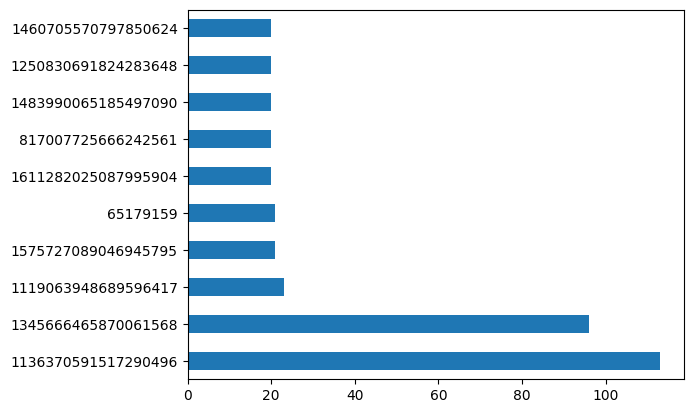

In [84]:
#top 10 user ids in cleaned data
cleaned_data['tweet_user_id'].value_counts().nlargest(10).plot.barh()

<AxesSubplot: ylabel='tweet_lang'>

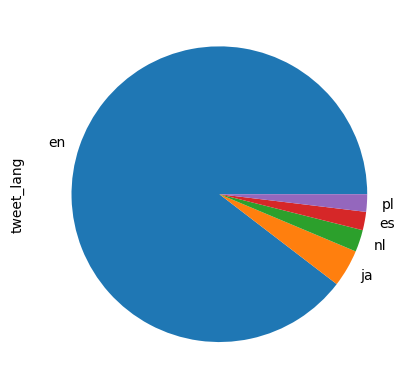

In [86]:
#different languages for the initial dataset
data['tweet_lang'].value_counts().nlargest(5).plot.pie()

<AxesSubplot: xlabel='tweet_created_at'>

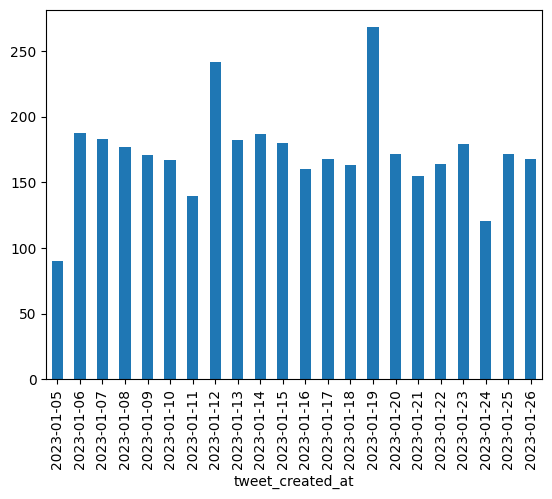

In [95]:
#distribution of dates in the cleaned dataset
cleaned_data["tweet_created_at"].groupby(cleaned_data["tweet_created_at"].dt.date).count().plot.bar()

<a id="section42"></a>
<div style="font-family:verdana;"><h3 style="font-family:verdana">WordCloud Analysis :</h3>

In [159]:
def print_wordCloud(date,tweet_string):
    print(date)
    wordcloud = WordCloud(width = 400, height = 400, stopwords = STOPWORDS,
                    background_color ='black', max_words=2000,
                    min_font_size = 10, collocations=False).generate(tweet_string)
    plt.figure(figsize = (7, 7), facecolor = 'k', edgecolor = 'k') 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.show()

def make_string(date):
    tweet_string = " ".join(cleaned_data[cleaned_data['tweet_created_at']==date]['tweet_text'])
    return tweet_string
    

2023-01-05 00:00:00


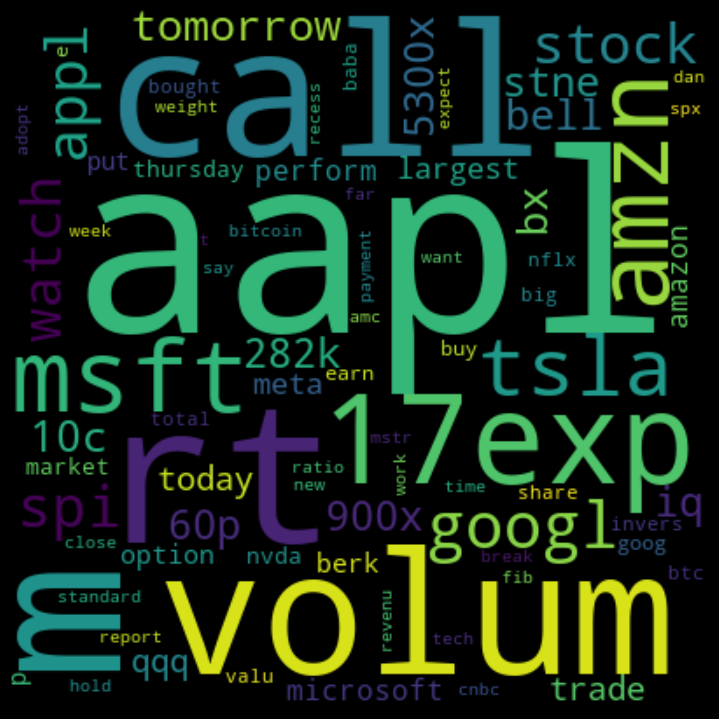

2023-01-06 00:00:00


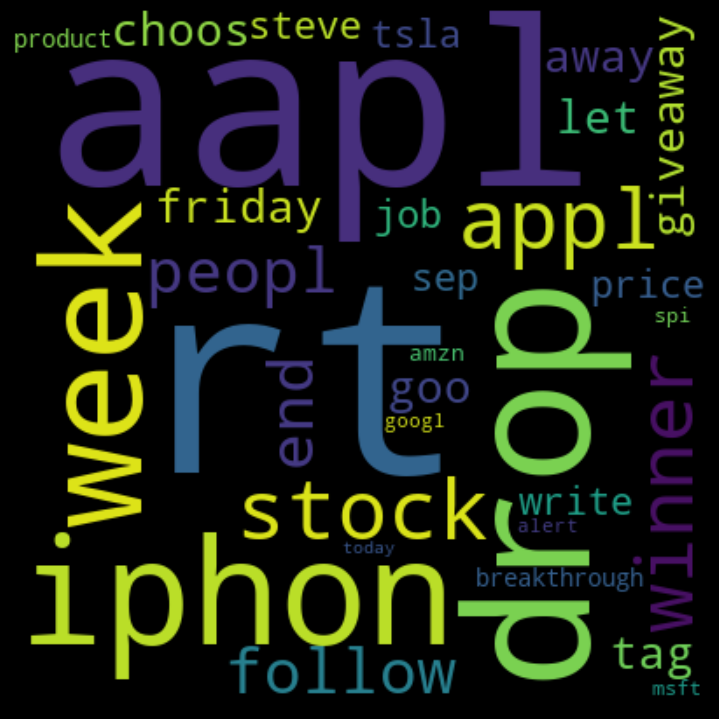

In [169]:
#get a wordcloud for every date in the DataFrame
dates = pd.to_datetime(cleaned_data['tweet_created_at']).dt.date.unique().tolist()
dates = sorted(dates)

for d in dates[:2]:
    d = datetime.combine(d, datetime.min.time())
    tweet_string = make_string(d)
    print_wordCloud(d,tweet_string)

# Modelling:

## Vader Model

In [309]:
#create Vader SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [310]:
#create new column 'scores' with the sentiment dictionary for each weet
cleaned_data['scores'] = cleaned_data['tweet_text'].apply(lambda text: analyzer.polarity_scores(text))

cleaned_data.head()

,tweet_user_id,tweet_text,tweet_created_at,scores
0,1506718242638909462,$ spy # spy c>399(e)/400.5/401.5/402/403.2 p<3...,2023-01-12,"{'neg': 0.079, 'neu': 0.921, 'pos': 0.0, 'comp..."
1,1508590781384183812,$ aapl look like good short 138 - 140,2023-01-12,"{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'comp..."
2,1138182455268184065,"aapl earning 2 week , be ?",2023-01-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1495138508930891777,thursday watchlist : $ aapl 137c>135 | 128p<13...,2023-01-12,"{'neg': 0.07, 'neu': 0.876, 'pos': 0.054, 'com..."
4,1364926639096881153,$ aapl new apple device app $ msft window ment...,2023-01-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [311]:
#create new column 'compound' with only the values from the sentiment dictionary key 'compound'
cleaned_data['compound']  = cleaned_data['scores'].apply(lambda dic: dic['compound'])

cleaned_data.head()

,tweet_user_id,tweet_text,tweet_created_at,scores,compound
0,1506718242638909462,$ spy # spy c>399(e)/400.5/401.5/402/403.2 p<3...,2023-01-12,"{'neg': 0.079, 'neu': 0.921, 'pos': 0.0, 'comp...",-0.5423
1,1508590781384183812,$ aapl look like good short 138 - 140,2023-01-12,"{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'comp...",0.6597
2,1138182455268184065,"aapl earning 2 week , be ?",2023-01-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,1495138508930891777,thursday watchlist : $ aapl 137c>135 | 128p<13...,2023-01-12,"{'neg': 0.07, 'neu': 0.876, 'pos': 0.054, 'com...",-0.2023
4,1364926639096881153,$ aapl new apple device app $ msft window ment...,2023-01-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000


In [312]:
# create new column 'sentiment' for each value in the 'compound' column -> 'pos' for values higher or equal to 0 and 'neg' for values lower than 0
cleaned_data['sentiment'] = cleaned_data['compound'].apply(lambda x: 'pos' if x >=0 else 'neg')

cleaned_data.head()

,tweet_user_id,tweet_text,tweet_created_at,scores,compound,sentiment
0,1506718242638909462,$ spy # spy c>399(e)/400.5/401.5/402/403.2 p<3...,2023-01-12,"{'neg': 0.079, 'neu': 0.921, 'pos': 0.0, 'comp...",-0.5423,neg
1,1508590781384183812,$ aapl look like good short 138 - 140,2023-01-12,"{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'comp...",0.6597,pos
2,1138182455268184065,"aapl earning 2 week , be ?",2023-01-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos
3,1495138508930891777,thursday watchlist : $ aapl 137c>135 | 128p<13...,2023-01-12,"{'neg': 0.07, 'neu': 0.876, 'pos': 0.054, 'com...",-0.2023,neg
4,1364926639096881153,$ aapl new apple device app $ msft window ment...,2023-01-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos


In [313]:
#append 'weights' column -> '1' for compound_score = 0 | '2' for compound_score between 0.5 and -0.5 | '3' for compound_score bigger than 0.5 or smaller than -0.5
cleaned_data['weights'] = cleaned_data['compound'].apply(lambda x: 1 if x == 0 else (2 if (0 < x < 0.5 or 0 > x > -0.5) else 3))

cleaned_data.head()

,tweet_user_id,tweet_text,tweet_created_at,scores,compound,sentiment,weights
0,1506718242638909462,$ spy # spy c>399(e)/400.5/401.5/402/403.2 p<3...,2023-01-12,"{'neg': 0.079, 'neu': 0.921, 'pos': 0.0, 'comp...",-0.5423,neg,3
1,1508590781384183812,$ aapl look like good short 138 - 140,2023-01-12,"{'neg': 0.0, 'neu': 0.565, 'pos': 0.435, 'comp...",0.6597,pos,3
2,1138182455268184065,"aapl earning 2 week , be ?",2023-01-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,1
3,1495138508930891777,thursday watchlist : $ aapl 137c>135 | 128p<13...,2023-01-12,"{'neg': 0.07, 'neu': 0.876, 'pos': 0.054, 'com...",-0.2023,neg,2
4,1364926639096881153,$ aapl new apple device app $ msft window ment...,2023-01-12,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,pos,1


In [315]:
#use either the 1. or the 2.
#1.create DataFrame based on a weighted daily average compound score
grouped = cleaned_data.groupby('tweet_created_at') #get data grouped by the date

#weighted avarage function
def weighted_avg(group):
    d = group['compound']
    w = group['weights']
    return (d * w).sum() / w.sum()

grouped = grouped.apply(weighted_avg) #apply function to grouped data
daily_sentiment_df_weighted = pd.DataFrame(grouped) # create new 'daily_sentiment_df' DatFrame

#reset index and rename columns
daily_sentiment_df_weighted = daily_sentiment_df_weighted.rename_axis('Date').reset_index()
daily_sentiment_df_weighted.set_axis(['Date', 'daily_sentiment'], axis=1, inplace=True)

daily_sentiment_df_weighted.head()

,Date,daily_sentiment
0,2023-01-05,0.104015
1,2023-01-06,0.263131
2,2023-01-07,0.320283
3,2023-01-08,0.323331
4,2023-01-09,0.039861


In [314]:
#2. create DataFrame based on an unweighted daily average compound score
daily_sentiment = cleaned_data.groupby("tweet_created_at")["compound"].mean()
daily_sentiment_df = pd.DataFrame(daily_sentiment) # create new 'daily_sentiment_df' DatFrame

#reset index and rename columns
daily_sentiment_df = daily_sentiment_df.rename_axis('Date').reset_index()
daily_sentiment_df.set_axis(['Date', 'daily_sentiment'], axis=1, inplace=True)

daily_sentiment_df.head()

,Date,daily_sentiment
0,2023-01-05,0.078678
1,2023-01-06,0.168533
2,2023-01-07,0.215343
3,2023-01-08,0.246569
4,2023-01-09,0.002287


In [322]:
# Write the daily sentiment data to an Excel sheet
daily_sentiment_df_weighted.to_csv("data/daily_sentiment_weighted_apple.csv")
daily_sentiment_df.to_csv("data/daily_sentiment_apple.csv")

### Compare Sentiment to real Stock Data

In [8]:
#import sentiment data
sentiment_df = pd.read_csv("data/daily_sentiment_apple.csv")

In [318]:
#import stock market data (the csv-file from 'stock_ticker_api.py')
ticker='AAPL' # e.g. 'AAPL' or 'TSLA'
data_type = 'Adj Close' #either 'Adj Close' or 'Volume'

#plot label
label = data_type

stock_df = pd.read_csv('data/{symbol}_{d_type}_daily.csv'.format(symbol=ticker, d_type=data_type))

#convert date string to timestamp and set 'Date' as index
stock_df['Date'] = stock_df['Date'].apply(lambda d: pd.to_datetime(d))
stock_df = stock_df.set_index(['Date'])

#fill missing dates with previous days value -> there is no trading on weekends
stock_df = stock_df.asfreq('D', method='ffill')

#get sentiment and dates from 'sentiment_df'
sentiment = sentiment_df['daily_sentiment']
dates = sentiment_df['Date']

In [ ]:
#stock_df.tail()

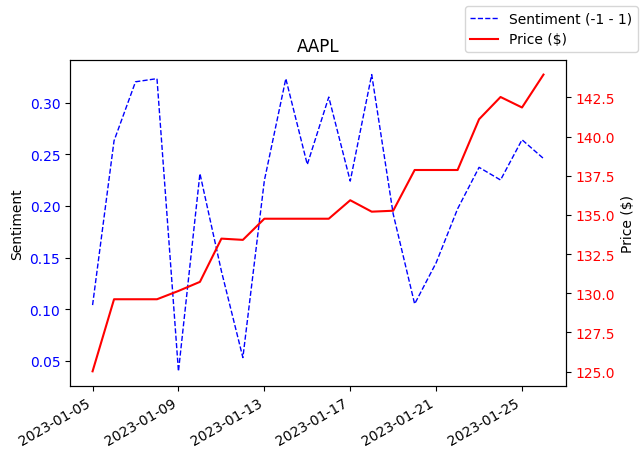

In [319]:
#set the correct label -> either 'Price' or 'Volume'
if data_type == 'Adj Close':
    label = 'Price ($)'
else:
    label = 'Volume'
    
fig, ax = plt.subplots()

#plot sentiment data
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
ax.plot(dates, sentiment, color='blue', linewidth=1, linestyle="--", label='Sentiment (-1 - 1)')
plt.gcf().autofmt_xdate()
ax.tick_params(axis='y', labelcolor='blue')
ax.set_ylabel('Sentiment')

# Generate new axes instance, on the x-axis (same position)
ax2 = ax.twinx()

#plot stock data
ax2.plot(dates,stock_df, color='red', label=label)
ax2.tick_params(axis='y', labelcolor='red')
ax2.ticklabel_format(axis='y', style='plain')
ax2.set_ylabel(label)

plt.title('{symbol}'.format(symbol=ticker))
plt.xlabel('Date')

fig.legend(loc='upper right')
plt.show()

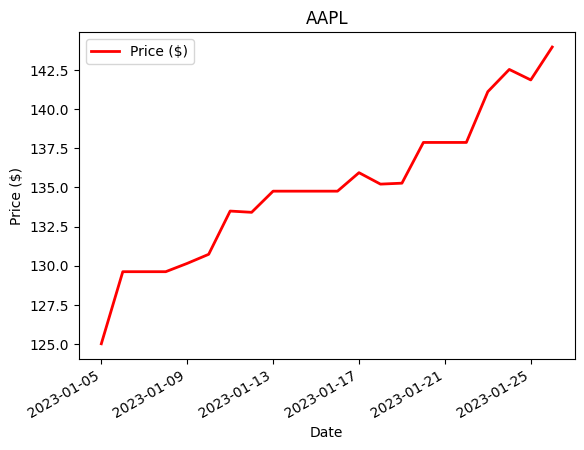

In [320]:
#plot only stock data
plt.plot(stock_df, color='red', label=label, linewidth=2)
plt.gcf().autofmt_xdate()
plt.title('{symbol}'.format(symbol=ticker))
plt.ylabel(label)
plt.xlabel('Date')
plt.legend()
plt.show()

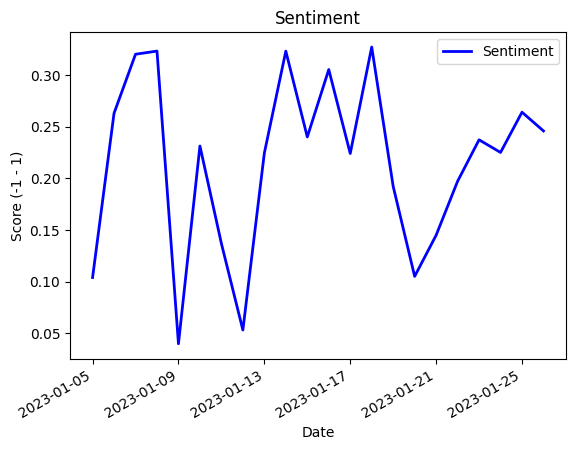

In [321]:
#plot only Sentiment
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.plot(dates,sentiment, color='blue', label="Sentiment", linewidth=2)
plt.gcf().autofmt_xdate()
plt.title('Sentiment')
plt.ylabel('Score (-1 - 1)')
plt.xlabel('Date')
plt.legend()
plt.show()

## SKlearn Regression Models
- Es gibt zu wenig Daten
- Für ausreichend Daten in dieser Form (ein Datenpunkt pro Tag), müssten entweder über Jahre gesammelt werden, oder es braucht den 'Academic Research'-Access-Level (https://developer.twitter.com/en/portal/products/academic-research)

In [286]:
#select the models
models = [DecisionTreeRegressor(), KNeighborsRegressor(), SVR(), LinearRegression(), DummyClassifier()]
label_encoder = preprocessing.LabelEncoder()

In [287]:
# Define X, y variables -> X = sentiment, y = stock data
X = daily_sentiment_df['daily_sentiment'].values.reshape(-1, 1)
y = stock_df[data_type].values


#split data into training and testing data -> test_size is 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=0)
y_test = label_encoder.fit_transform(y_test) #is of type 'continuous' but model expects it to be 'multiclass'

In [288]:
Name = []
Accuracy = []
Precision = []
F1_Score = []
Recall = []
Time_Taken = []

for model in models:
    name = type(model).__name__
    Name.append(name)
    model = model
    begin = t.time()
    model.fit(X_train,y_train)
    prediction = model.predict(X_test)
    end = t.time()
    
    #print(type_of_target(prediction)) #is of type 'continuous' but Metrics expect it to be 'multiclass'
    prediction = label_encoder.fit_transform(prediction)

    Accuracy.append(accuracy_score(prediction,y_test))
    Precision.append(precision_score(prediction,y_test,average = 'macro'))
    Recall.append(recall_score(prediction,y_test,average = 'macro'))
    F1_Score.append(f1_score(prediction,y_test,average = 'macro'))
    Time_Taken.append(end-begin)
    print(name + ' Successfully Trained')

DecisionTreeRegressor Successfully Trained
KNeighborsRegressor Successfully Trained
SVR Successfully Trained
LinearRegression Successfully Trained
DummyClassifier Successfully Trained


In [289]:
Dict = {'Name':Name,'Accuracy':Accuracy,'Precision_score':Precision,'Recall_score':Recall,
        'F1_score':F1_Score,'Time Taken':Time_Taken}
model_df = pd.DataFrame(Dict)
model_df

,Name,Accuracy,Precision_score,Recall_score,F1_score,Time Taken
0,DecisionTreeRegressor,0.2,0.2,0.20,0.200000,0.000983
1,KNeighborsRegressor,0.2,0.2,0.10,0.133333,0.002003
2,SVR,0.6,0.6,0.60,0.600000,0.000000
3,LinearRegression,0.0,0.0,0.00,0.000000,0.001010
4,DummyClassifier,0.2,0.2,0.04,0.066667,0.069708


### Accuracy and Time-Taken Plots:

In [280]:
model_df.sort_values(by = 'Accuracy',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Accuracy", title='Accuracy VS Model')
fig.show()

In [281]:
model_df.sort_values(by = 'Time Taken',ascending = False,inplace = True)
fig = px.line(model_df, x="Name", y="Time Taken", title='Time Taken VS Model')
fig.show()

### Regression Plot with generated sentiment values

0.10515839570669494 SVR


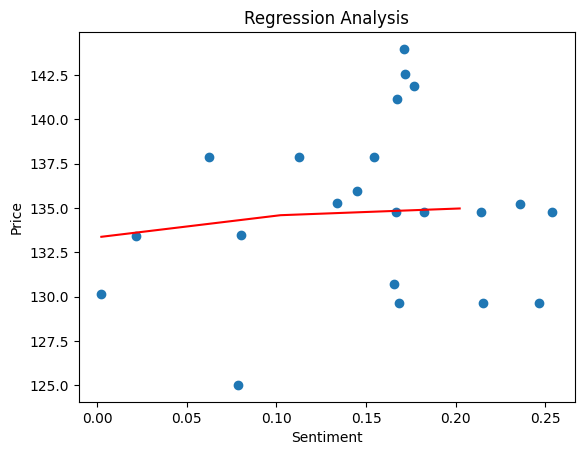

In [323]:
# Create the model -> models variable from above
model = models[2]

X = daily_sentiment_df['daily_sentiment'].values.reshape(-1, 1)
y = stock_df[data_type].values

# Fit the model to the data
model.fit(X, y)

#print score and name of the model
print(model.score(X, y), type(model).__name__)

# Create a range of values for the sentiment values
x_range = np.arange(X.min(), X.max(), 0.1)

# Use the model to predict the price for each value in the sentiment-range
y_pred = model.predict(x_range.reshape(-1, 1))

# Plot the data and the regression curve
plt.scatter(X, y)
plt.plot(x_range, y_pred, color='red')
plt.xlabel('Sentiment')
plt.ylabel('Price')
plt.title('Regression Analysis')
plt.show()